In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import  layers, models, regularizers, optimizers
import os

In [4]:
dir = 'C:/Users/schne/Desktop/Fish/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path_way','Type'])
df['path_way']=path
df['Type']=label

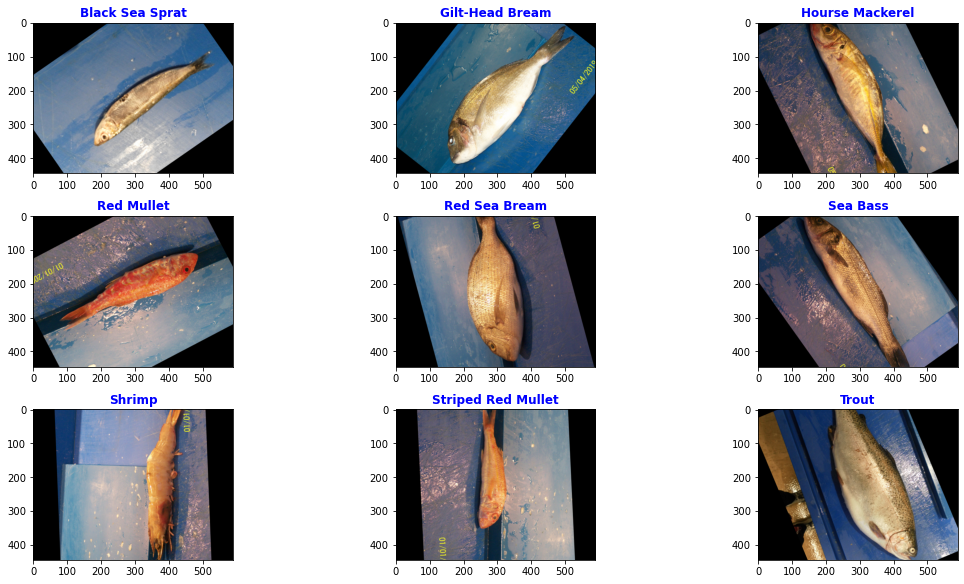

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['Type'].unique(): 
    ax[j].imshow(plt.imread(df[df['Type']==i].iloc[0,0]))
    ax[j].set_title(i, color = 'Blue', weight = 'bold')
    j=j+1

In [33]:
X_train, X_test = train_test_split(df, test_size = .20, random_state = 500)

In [34]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
train_generator=datagen.flow_from_dataframe(dataframe=X_train, x_col='path_way', y_col='Type',
                                           class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
valid_generator=datagen.flow_from_dataframe(dataframe=X_train, x_col='path_way', y_col='Type',
                                         class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=X_test, x_col='path_way', y_col='Type',
                                         class_mode='categorical', color_mode='rgb', batch_size=32)

Found 5400 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [40]:
image_shape=(256,256,3)

In [42]:
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)
pre_trained.trainable=False
inp_model = pre_trained.input
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(9, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
V1_Model = model.fit(train_generator,epochs=15,
                              validation_data=valid_generator,
                                )

Epoch 1/15
169/169 [==============================] - 105s 611ms/step - loss: 0.5066 - accuracy: 0.8306 - val_loss: 0.0453 - val_accuracy: 0.9906
Epoch 2/15
169/169 [==============================] - 105s 622ms/step - loss: 0.1033 - accuracy: 0.9678 - val_loss: 0.0142 - val_accuracy: 0.9978
Epoch 3/15
169/169 [==============================] - 109s 646ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 4/15
169/169 [==============================] - 107s 636ms/step - loss: 0.0365 - accuracy: 0.9894 - val_loss: 0.0062 - val_accuracy: 0.9978
Epoch 5/15
169/169 [==============================] - 105s 623ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0072 - val_accuracy: 0.9978
Epoch 6/15
169/169 [==============================] - 104s 616ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0079 - val_accuracy: 0.9972
Epoch 7/15
169/169 [==============================] - 105s 623ms/step - loss: 0.0296 - accuracy: 0.9891 - val_loss: 0.0059 -

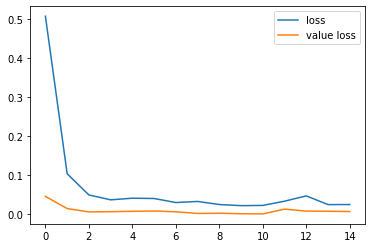

In [47]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(V1_Model.history['loss'], label='loss')
plt.plot(V1_Model.history['val_loss'], label='value loss')
plt.legend()

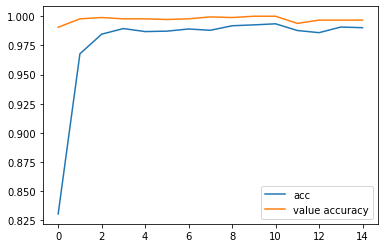

In [48]:
# Plot accuracy per iteration
plt.plot(V1_Model.history['accuracy'], label='acc')
plt.plot(V1_Model.history['val_accuracy'], label='value accuracy')
plt.legend()